Group members of this project are following.

1.   Muhammad Arbaz
2.   Mubashir-ul-hassan
2.   Aroosa


In [ ]:
pip install yfinance

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
# Importing required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import matplotlib.dates as mdates
import plotly.express as px

### 2. Data Preprocessing and Preparation

In [103]:
#Enter below to download the dataset from yfinance

In [146]:
# Download historical data for SPY from Yahoo Finance
spy = yf.download('SPY', start='2010-01-01', end='2023-01-01')

# Split data into training (2010-2020) and validation (2020-2023) sets
training_data = spy['Adj Close']['2010-01-01':'2020-12-31']
validation_data = spy['Adj Close']['2021-01-01':'2023-01-01']

# Use 'Adj Close' prices as the stock price for training
training_set = training_data.values.reshape(-1, 1)
validation_set = validation_data.values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


In [147]:
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,87.129944,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,87.360596,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,87.422073,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,87.791138,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,88.083260,126402800
...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,377.177399,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,375.690002,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,371.020966,70911500


**Dataset from the application. The dataset contains the stock price for each minutes. Run below 3 cells to make predictions on this data.**

In [122]:
df = pd.read_parquet('./drive/MyDrive/ml_finance/SPY_2020-04-07_2022-04-06.parquet')

In [123]:
df

,VOLUME,VW,OPEN,CLOSE,HIGHT,LOW,t,TRANSACTIONS,a,op,DATE
0,612879.0,268.6549,268.72,269.140,269.18,268.3000,1586271840000,5753.0,NaN,NaN,2020-04-07 15:04:00
1,586743.0,269.2206,269.14,269.380,269.49,268.8200,1586271900000,5555.0,NaN,NaN,2020-04-07 15:05:00
2,382167.0,269.3616,269.38,269.420,269.55,269.1400,1586271960000,3427.0,NaN,NaN,2020-04-07 15:06:00
3,394478.0,269.5897,269.44,269.860,269.91,269.1800,1586272020000,3679.0,NaN,NaN,2020-04-07 15:07:00
4,513549.0,269.9245,269.85,269.775,270.10,269.7500,1586272080000,4273.0,NaN,NaN,2020-04-07 15:08:00
...,...,...,...,...,...,...,...,...,...,...,...
425768,2392.0,445.3976,445.41,445.370,445.41,445.3700,1649289300000,25.0,446.3476,446.89,2022-04-06 23:55:00
425769,2147.0,445.3218,445.35,445.300,445.35,445.3000,1649289360000,26.0,446.3476,446.89,2022-04-06 23:56:00
425770,3647.0,445.2387,445.32,445.240,445.32,445.1800,1649289420000,32.0,446.3475,446.89,2022-04-06 23:57:00
425771,2169.0,445.2137,445.27,445.200,445.27,445.1804,1649289480000,26.0,446.3475,446.89,2022-04-06 23:58:00


In [124]:
df['Date'] = df['DATE']
df['Adj Close'] = df['CLOSE']

training_data = df[(df['DATE'] >= '2020-04-07') & (df['DATE'] < '2021-04-07')]['Adj Close']
validation_data = df[(df['DATE'] >= '2021-04-07') & (df['DATE'] < '2022-01-01')]['Adj Close']

# Use 'Adj Close' prices as the stock price for training
training_set = training_data.values.reshape(-1, 1)
validation_set = validation_data.values.reshape(-1, 1)

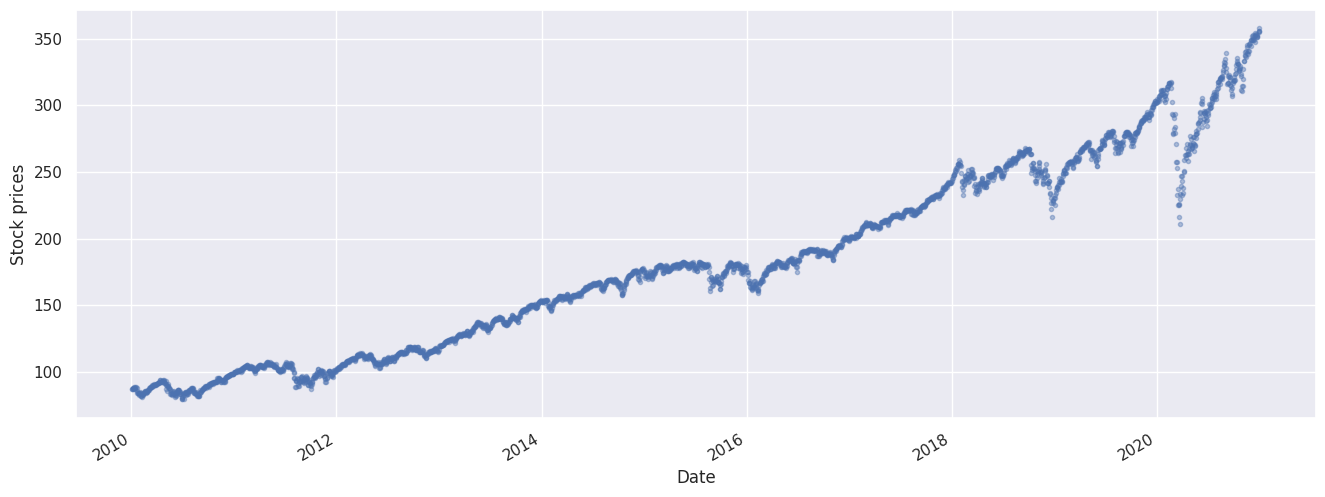

In [148]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(18, 6)})


axes      = training_data.plot(marker='.',
                                       alpha=0.4,
                                       linestyle='None',
                                       figsize=(16, 6),
                                       subplots=True)

for ax in axes:
    ax.set_ylabel('Stock prices')

In [149]:
# Feature scaling using MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
validation_set_scaled = sc.transform(validation_set)

### 3. Building and Training the LSTM Model

In [150]:
# Creating input sequences for training
def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(training_set_scaled)
X_validation, y_validation = create_sequences(validation_set_scaled)

# Reshape inputs for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))

#### 3.2 Architecture of the LSTM Model

In [151]:
# Building the LSTM Model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))

#### 3.3 Compilation and Training of the LSTM Model


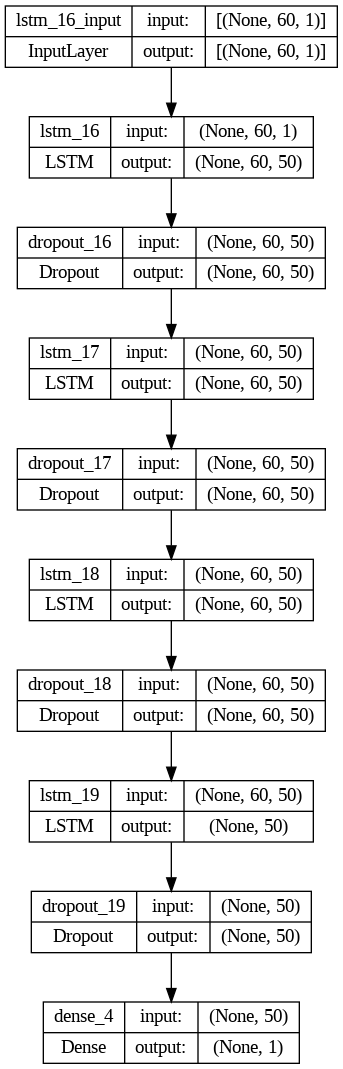

In [152]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [155]:
# Compiling the LSTM Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the Model and store history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50
85/85 [==============================] - 10s 31ms/step - loss: 0.0040 - val_loss: 0.0148
Epoch 2/50
85/85 [==============================] - 1s 17ms/step - loss: 0.0024 - val_loss: 0.0054
Epoch 3/50
85/85 [==============================] - 2s 21ms/step - loss: 0.0024 - val_loss: 0.0236
Epoch 4/50
85/85 [==============================] - 2s 18ms/step - loss: 0.0019 - val_loss: 0.0076
Epoch 5/50
85/85 [==============================] - 1s 15ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 6/50
85/85 [==============================] - 1s 16ms/step - loss: 0.0017 - val_loss: 0.0052
Epoch 7/50
85/85 [==============================] - 1s 16ms/step - loss: 0.0016 - val_loss: 0.0126
Epoch 8/50
85/85 [==============================] - 1s 15ms/step - loss: 0.0015 - val_loss: 0.0063
Epoch 9/50
85/85 [==============================] - 1s 15ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 10/50
85/85 [==============================] - 1s 16ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 11

#### 3.4 Visualizing Losses over Epochs

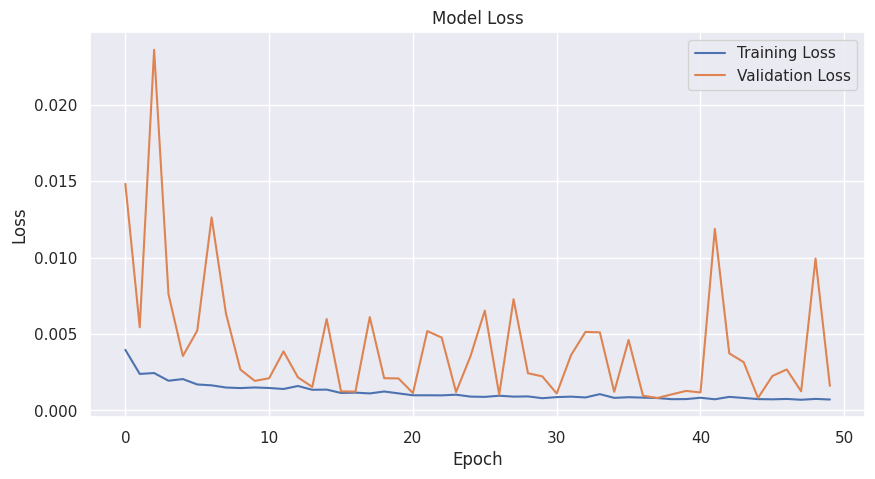

In [156]:
# Plot loss and accuracy during training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 4. Application of Trained Model for Prediction

#### 4.1 Downloading and Preparing Test Data

In [157]:
# Download test data for SPY from Yahoo Finance
spy_test = yf.download('SPY', start='2023-01-01', end='2023-07-31')
# Use 'Adj Close' prices as the test data
real_stock_price = spy_test['Adj Close'].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


#### 4.2 Preparing Test Data for LSTM

In [158]:
# Preparing Test Data
dataset_total = pd.concat((spy['Adj Close'], spy_test['Adj Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(spy_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**Run Below for custom dataset test data.**

In [143]:
test_df = df[(df['DATE'] >= '2022-01-01')]
test_data = test_df['Adj Close']
real_stock_price = test_data.values.reshape(-1, 1)
# Preparing Test Data
dataset_total = pd.concat((training_data, validation_data, test_data), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Do Predictions

In [159]:
# Making Predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

5/5 [==============================] - 1s 8ms/step


# Mean absolute Error


In [160]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(real_stock_price, predicted_stock_price)

9.735255314753605

#### Run below for yfinance spy dataset

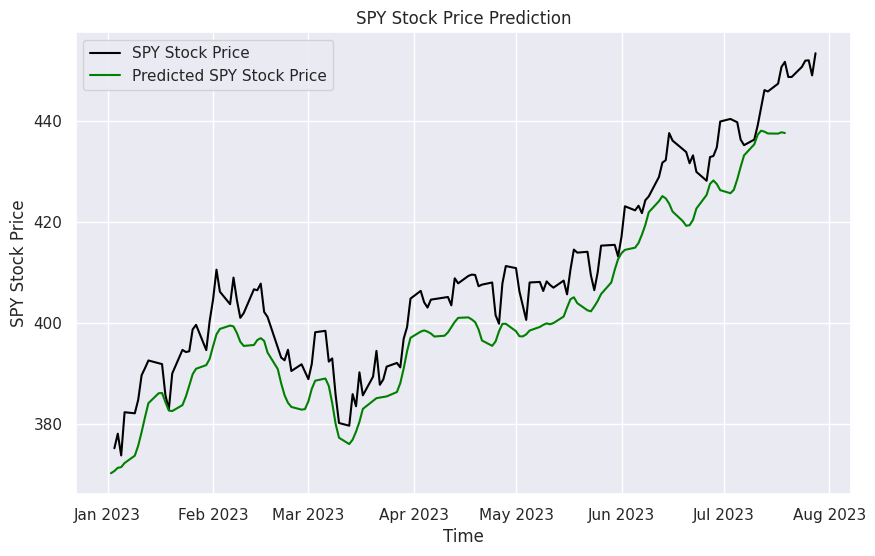

In [161]:
# Prepare dates for the predicted stock prices
date_range = pd.date_range(start='2023-01-01', periods=len(predicted_stock_price), freq='B')  # 'B' for business day frequency

# Visualizing Results with Month and Year on X-axis
plt.figure(figsize=(10, 6))
plt.plot(spy_test.index, real_stock_price, color='black', label='SPY Stock Price')
plt.plot(date_range, predicted_stock_price, color='green', label='Predicted SPY Stock Price')
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show tick marks for every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis labels as 'Jan 2023', 'Feb 2023', etc.
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()

#### Run below for custome spy dataset

In [162]:
# # Prepare dates for the predicted stock prices
# # date_range = pd.date_range(start='2022-01-01', periods=len(predicted_stock_price), freq='B')  # 'B' for business day frequency

# # Visualizing Results with Month and Year on X-axis
# plt.figure(figsize=(10, 6))
# plt.plot(test_df.index, real_stock_price, color='black', label='SPY Stock Price')
# plt.plot(test_df.index, predicted_stock_price, color='green', label='Predicted SPY Stock Price')
# # plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show tick marks for every 3 months
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis labels as 'Jan 2023', 'Feb 2023', etc.
# plt.title('SPY Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('SPY Stock Price')
# plt.legend()
# plt.show()